<a href="https://colab.research.google.com/gist/GOikonomidis/14164c3e17034298a04bc97046467c73/paintgenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Dropout, LeakyReLU, BatchNormalization
from keras.layers import Activation, ZeroPadding2D, UpSampling2D
from keras.layers import Input, Reshape
from matplotlib import pyplot
from IPython.display import clear_output
import numpy
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from numpy import zeros
from numpy import ones
from numpy import asarray
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
# import files class to upload files to colab
from google.colab import files

In [ ]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"georgeoikon","key":"91622db64a18fa9599c96ef0f71ae763"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download 'ikarus777/best-artworks-of-all-time'
! mkdir best-artworks-of-all-time
! unzip best-artworks-of-all-time.zip  -d best-artworks-of-all-time

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_61.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_62.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_63.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_64.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_65.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_66.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_67.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_68.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_69.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_7.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_70.jpg  
  inflating: best-artworks-of-all-time/resized/resized/Henri_Rousseau_8.jpg  

In [ ]:
dataset_path = '/content/best-artworks-of-all-time/images/images' #paths through google colab


In [ ]:
WIDTH = 64 #for preprocessing data
HEIGHT = 64
IMG_SIZE = (WIDTH,HEIGHT)

In [ ]:
    dataset = []
    transform_ds = transforms.Compose([transforms.Resize(IMG_SIZE),]) #define transformation
    
    image_folder = torchvision.datasets.ImageFolder(root=dataset_path,
                                     transform=transform_ds) 

    print('Number of artworks found: ',len(image_folder))
    
    
    print("Converting images, this will take a few minutes")
    for i in range (len(image_folder)):
        image_array = numpy.array(image_folder[i][0])
        dataset.append(image_array)
        if (i%500 == 0):
            print("Pictures processed: ", i)
            
dataset = np.array(dataset, dtype=np.float32)
dataset = (dataset - 128) / 128 #Normalize to [-1 , 1]


print("Dataset length: ", len(dataset))

Number of artworks found:  8774
Converting images, this will take a few minutes
Pictures processed:  0
Pictures processed:  500
Pictures processed:  1000
Pictures processed:  1500
Pictures processed:  2000
Pictures processed:  2500
Pictures processed:  3000
Pictures processed:  3500
Pictures processed:  4000
Pictures processed:  4500
Pictures processed:  5000
Pictures processed:  5500
Pictures processed:  6000
Pictures processed:  6500
Pictures processed:  7000
Pictures processed:  7500
Pictures processed:  8000
Pictures processed:  8500
Dataset length:  8774


In [ ]:
dataset[3].shape #checking if the preprocess is done correctly


(64, 64, 3)

In [ ]:
#Use a TensorFlow Dataset to manage the images for easy shuffling, dividing etc
BATCH_SIZE = 32

training_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(9000).batch(BATCH_SIZE)

In [ ]:
import pandas as pd

artists = pd.read_csv('/content/best-artworks-of-all-time//artists.csv') #checking the csv file of the dataset 
artists.head()

id  ... paintings
0   0  ...       193
1   1  ...        88
2   2  ...        70
3   3  ...        73
4   4  ...       194

[5 rows x 8 columns]

In [ ]:
no_of_paintings = artists[['name','paintings','genre']].sort_values(ascending=False, by='paintings')
no_of_paintings.head(10) #most paintings on the dataset. The generated images will be most influenced by this painters

name  paintings                         genre
8        Vincent van Gogh        877            Post-Impressionism
30            Edgar Degas        702                 Impressionism
13          Pablo Picasso        439                        Cubism
15  Pierre-Auguste Renoir        336                 Impressionism
19         Albrecht Dürer        328          Northern Renaissance
46           Paul Gauguin        311  Symbolism,Post-Impressionism
16         Francisco Goya        291                   Romanticism
31              Rembrandt        262                       Baroque
20          Alfred Sisley        259                 Impressionism
32                 Titian        255    High Renaissance,Mannerism

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

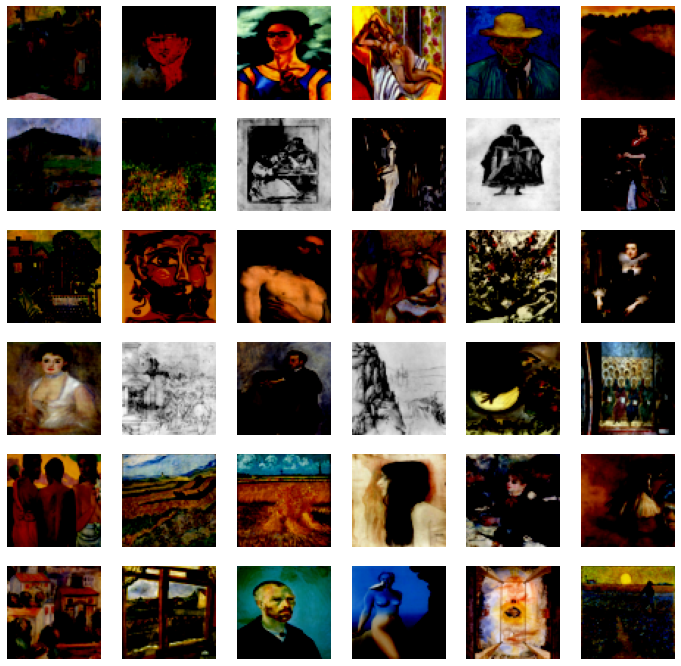

In [ ]:
import matplotlib.pyplot as plt
import random

np.random.shuffle(dataset) #Shuffle the images

fig = plt.figure(figsize=(12,12))  #plotting some random paintings
for i in range(1,37):
    fig.add_subplot(6,6,i)
    plt.imshow(dataset[i])
    plt.axis('off')

In [ ]:
def build_generator(seed_size, channels): 
    
    model = Sequential()

    model.add(Dense(64*64,activation="relu",input_dim=seed_size)) #64x64 units
    model.add(Reshape((4,4,256))) 

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
  
    model.add(UpSampling2D(size = (2,2))) # 2,2 for 64x64
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh")) #The function takes any real value as input and outputs values in the range -1 to 1
    
    return model

In [ ]:
def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, 
                     padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    return model

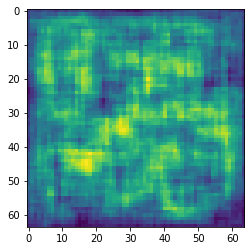

In [ ]:
SEED_SIZE = 100
IMAGE_CHANNELS = 3

generator = build_generator(SEED_SIZE,IMAGE_CHANNELS)

noise = tf.random.normal([1,SEED_SIZE])  #genarating noise for input on our generator
generated_image = generator(noise,training=False)

plt.imshow(generated_image[0, :, :, 0]) #plotting the input noise

In [ ]:
image_shape = (HEIGHT, HEIGHT, IMAGE_CHANNELS)  #64,64,3

discriminator = build_discriminator(image_shape) 
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.5002059]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy() #Computes the cross-entropy loss between true labels and predicted labels.

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss #computing the total loss of the discriminator

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output) #learning the success of the generated images

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1.2e-4, 0.5) #using adam for less memory because we have a large dataset
discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-4, 0.5)

In [ ]:
@tf.function
def train_step(images):
    seed = tf.random.normal([BATCH_SIZE, SEED_SIZE])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(seed, training = True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        
        gradients_of_generator = gen_tape.gradient(
            gen_loss,
            generator.trainable_variables
        )
        gradients_of_discriminator = disc_tape.gradient(
            disc_loss, 
            discriminator.trainable_variables
        )
        
        generator_optimizer.apply_gradients(zip(gradients_of_generator,
                                                generator.trainable_variables))
        
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, 
                                                    discriminator.trainable_variables))
        
        return gen_loss, disc_loss

In [ ]:
def train(dataset, epochs):
        
    for epoch in range(epochs):
        gen_loss_list = []
        disc_loss_list = []
        
        for image_batch in dataset:
            t = train_step(image_batch)
            gen_loss_list.append(t[0])
            disc_loss_list.append(t[1])
            
        g_loss = sum(gen_loss_list) / len(gen_loss_list) #calculate losses
        d_loss = sum(disc_loss_list) / len(disc_loss_list)
        
        print(f'Epoch {epoch+1}, gen loss = {g_loss}, disc loss = {d_loss}')

In [ ]:
train(training_dataset, 20)


Epoch 1, gen loss = 3.030928373336792, disc loss = 0.956180989742279
Epoch 2, gen loss = 2.439410924911499, disc loss = 1.3016505241394043
Epoch 3, gen loss = 1.216592788696289, disc loss = 1.6082062721252441
Epoch 4, gen loss = 1.1840424537658691, disc loss = 1.401441216468811
Epoch 5, gen loss = 1.1532948017120361, disc loss = 1.386112093925476
Epoch 6, gen loss = 1.1425644159317017, disc loss = 1.3933273553848267
Epoch 7, gen loss = 1.0455217361450195, disc loss = 1.4363573789596558
Epoch 8, gen loss = 0.9369032979011536, disc loss = 1.4509196281433105
Epoch 9, gen loss = 0.9554674029350281, disc loss = 1.4211337566375732
Epoch 10, gen loss = 0.9688462018966675, disc loss = 1.4195796251296997
Epoch 11, gen loss = 0.9807711243629456, disc loss = 1.3909289836883545
Epoch 12, gen loss = 0.9367936849594116, disc loss = 1.4316275119781494
Epoch 13, gen loss = 1.1415331363677979, disc loss = 1.3441638946533203
Epoch 14, gen loss = 0.961163341999054, disc loss = 1.4630992412567139
Epoch 15

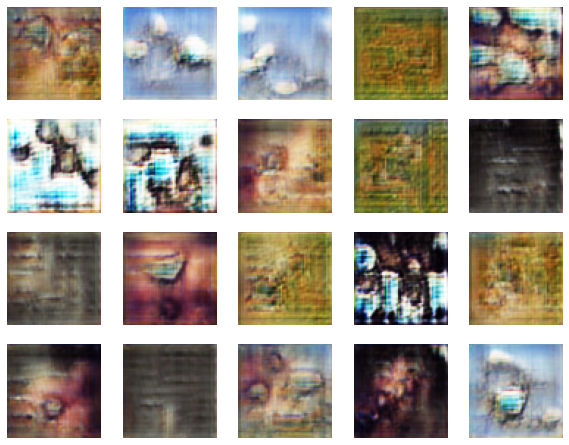

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 20)

Epoch 1, gen loss = 1.0406519174575806, disc loss = 1.3177016973495483
Epoch 2, gen loss = 1.0809746980667114, disc loss = 1.342358946800232
Epoch 3, gen loss = 1.0657366514205933, disc loss = 1.3130046129226685
Epoch 4, gen loss = 1.0118881464004517, disc loss = 1.3739761114120483
Epoch 5, gen loss = 1.038385033607483, disc loss = 1.312620997428894
Epoch 6, gen loss = 1.031714677810669, disc loss = 1.3349833488464355
Epoch 7, gen loss = 0.9687885046005249, disc loss = 1.3659393787384033
Epoch 8, gen loss = 1.0503406524658203, disc loss = 1.3102519512176514
Epoch 9, gen loss = 1.106592059135437, disc loss = 1.2931517362594604
Epoch 10, gen loss = 1.0407392978668213, disc loss = 1.3272185325622559
Epoch 11, gen loss = 0.9733744859695435, disc loss = 1.3680273294448853
Epoch 12, gen loss = 1.0078606605529785, disc loss = 1.3398782014846802
Epoch 13, gen loss = 1.0436232089996338, disc loss = 1.29672110080719
Epoch 14, gen loss = 1.0545575618743896, disc loss = 1.2958952188491821
Epoch 15

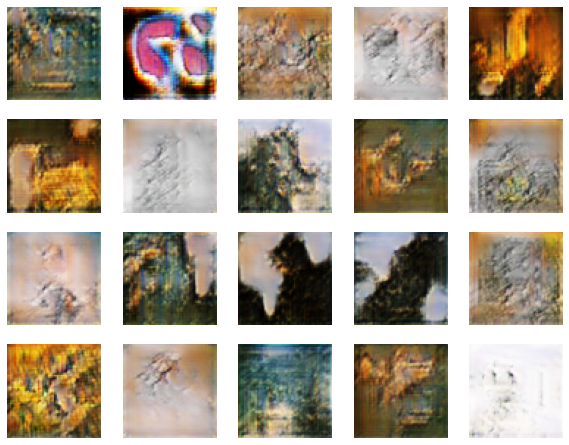

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 20)

Epoch 1, gen loss = 1.0489410161972046, disc loss = 1.3077304363250732
Epoch 2, gen loss = 1.0745484828948975, disc loss = 1.259173035621643
Epoch 3, gen loss = 1.0903517007827759, disc loss = 1.268102765083313
Epoch 4, gen loss = 1.107184886932373, disc loss = 1.262664794921875
Epoch 5, gen loss = 1.0790376663208008, disc loss = 1.2897850275039673
Epoch 6, gen loss = 0.9944238066673279, disc loss = 1.3599363565444946
Epoch 7, gen loss = 1.050272822380066, disc loss = 1.2737226486206055
Epoch 8, gen loss = 1.0563572645187378, disc loss = 1.2852482795715332
Epoch 9, gen loss = 1.1165544986724854, disc loss = 1.25928795337677
Epoch 10, gen loss = 1.103980541229248, disc loss = 1.269091248512268
Epoch 11, gen loss = 1.0604594945907593, disc loss = 1.2964469194412231
Epoch 12, gen loss = 1.0029417276382446, disc loss = 1.349448323249817
Epoch 13, gen loss = 1.0859431028366089, disc loss = 1.242400884628296
Epoch 14, gen loss = 1.029325008392334, disc loss = 1.3107364177703857
Epoch 15, gen

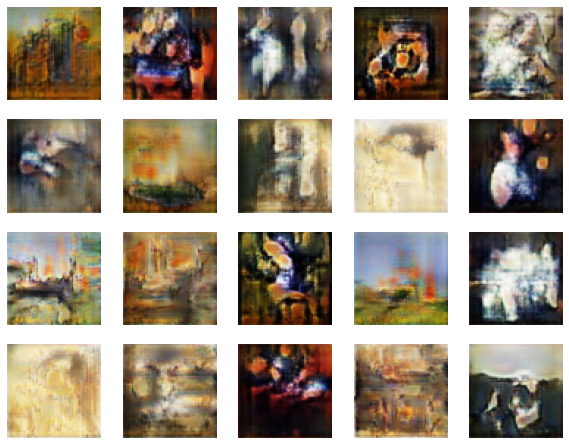

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 50)

Epoch 1, gen loss = 1.0862385034561157, disc loss = 1.2711752653121948
Epoch 2, gen loss = 1.0182514190673828, disc loss = 1.3208540678024292
Epoch 3, gen loss = 1.0286937952041626, disc loss = 1.2688266038894653
Epoch 4, gen loss = 1.1797785758972168, disc loss = 1.1811671257019043
Epoch 5, gen loss = 1.2580702304840088, disc loss = 1.1359057426452637
Epoch 6, gen loss = 1.159096598625183, disc loss = 1.248871922492981
Epoch 7, gen loss = 1.1703402996063232, disc loss = 1.2261927127838135
Epoch 8, gen loss = 1.1998870372772217, disc loss = 1.1757042407989502
Epoch 9, gen loss = 1.209509015083313, disc loss = 1.215014100074768
Epoch 10, gen loss = 1.2049802541732788, disc loss = 1.1990792751312256
Epoch 11, gen loss = 1.1718658208847046, disc loss = 1.219443917274475
Epoch 12, gen loss = 1.1805628538131714, disc loss = 1.1947543621063232
Epoch 13, gen loss = 1.1681257486343384, disc loss = 1.203217625617981
Epoch 14, gen loss = 1.2333265542984009, disc loss = 1.1708400249481201
Epoch 1

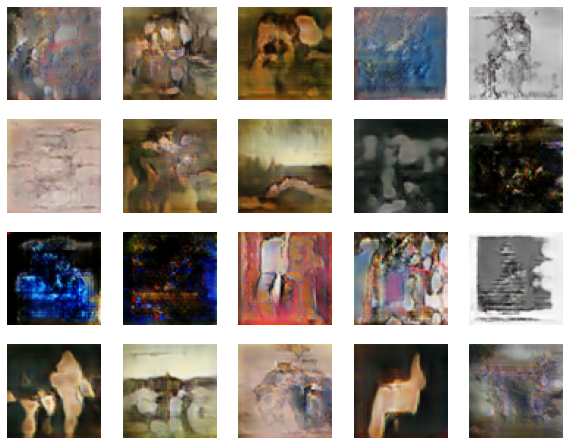

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 20)

Epoch 1, gen loss = 1.5202817916870117, disc loss = 1.051044225692749
Epoch 2, gen loss = 1.428229570388794, disc loss = 1.1326814889907837
Epoch 3, gen loss = 1.4512555599212646, disc loss = 1.0638951063156128
Epoch 4, gen loss = 1.5102181434631348, disc loss = 1.0876245498657227
Epoch 5, gen loss = 1.475990891456604, disc loss = 1.067833423614502
Epoch 6, gen loss = 1.4407132863998413, disc loss = 1.0895788669586182
Epoch 7, gen loss = 1.4202734231948853, disc loss = 1.08906888961792
Epoch 8, gen loss = 1.480385661125183, disc loss = 1.0475913286209106
Epoch 9, gen loss = 1.4585371017456055, disc loss = 1.0751506090164185
Epoch 10, gen loss = 1.4418572187423706, disc loss = 1.094818353652954
Epoch 11, gen loss = 1.4777463674545288, disc loss = 1.0561294555664062
Epoch 12, gen loss = 1.4894920587539673, disc loss = 1.0522496700286865
Epoch 13, gen loss = 1.5207701921463013, disc loss = 1.0337390899658203
Epoch 14, gen loss = 1.5148437023162842, disc loss = 1.0219018459320068
Epoch 15,

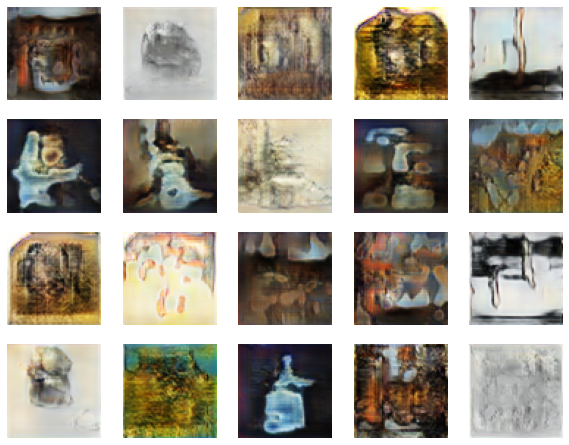

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 20)

Epoch 1, gen loss = 1.7064169645309448, disc loss = 0.9511757493019104
Epoch 2, gen loss = 1.6560171842575073, disc loss = 0.9902085065841675
Epoch 3, gen loss = 1.623537302017212, disc loss = 0.976121187210083
Epoch 4, gen loss = 1.6133768558502197, disc loss = 1.0748258829116821
Epoch 5, gen loss = 1.5793671607971191, disc loss = 1.0150668621063232
Epoch 6, gen loss = 1.5544902086257935, disc loss = 1.061933994293213
Epoch 7, gen loss = 1.585687518119812, disc loss = 1.0043361186981201
Epoch 8, gen loss = 1.6327502727508545, disc loss = 0.9881487488746643
Epoch 9, gen loss = 1.6921465396881104, disc loss = 0.9817821979522705
Epoch 10, gen loss = 1.6165313720703125, disc loss = 1.0088759660720825
Epoch 11, gen loss = 1.6622687578201294, disc loss = 0.9830487370491028
Epoch 12, gen loss = 1.6641125679016113, disc loss = 0.97039794921875
Epoch 13, gen loss = 1.7083073854446411, disc loss = 0.9748069047927856
Epoch 14, gen loss = 1.6472095251083374, disc loss = 0.99798583984375
Epoch 15,

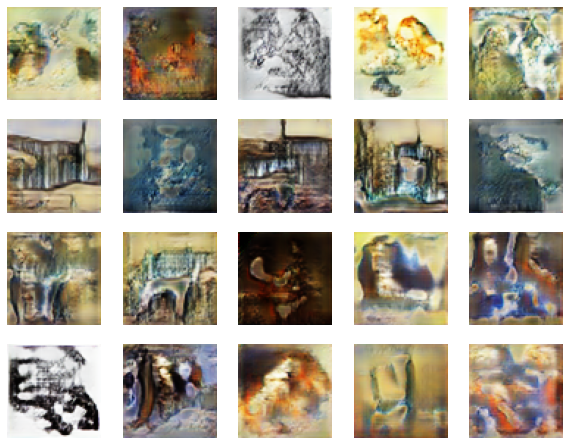

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])   #plotting some random images from the generator
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 50)

Epoch 1, gen loss = 1.7510013580322266, disc loss = 0.9761691093444824
Epoch 2, gen loss = 1.7001428604125977, disc loss = 0.9703373312950134
Epoch 3, gen loss = 1.7093000411987305, disc loss = 0.9937113523483276
Epoch 4, gen loss = 1.8210991621017456, disc loss = 0.9104903340339661
Epoch 5, gen loss = 1.7969958782196045, disc loss = 0.933455228805542
Epoch 6, gen loss = 1.7575911283493042, disc loss = 0.950556218624115
Epoch 7, gen loss = 1.8349900245666504, disc loss = 0.8872470855712891
Epoch 8, gen loss = 1.8003270626068115, disc loss = 0.9274950623512268
Epoch 9, gen loss = 1.8237552642822266, disc loss = 0.9268136024475098
Epoch 10, gen loss = 1.8307567834854126, disc loss = 0.9271082878112793
Epoch 11, gen loss = 1.807408332824707, disc loss = 0.9510533809661865
Epoch 12, gen loss = 1.796355128288269, disc loss = 0.956757128238678
Epoch 13, gen loss = 1.8638616800308228, disc loss = 0.8724175095558167
Epoch 14, gen loss = 1.8937737941741943, disc loss = 0.9020667672157288
Epoch 

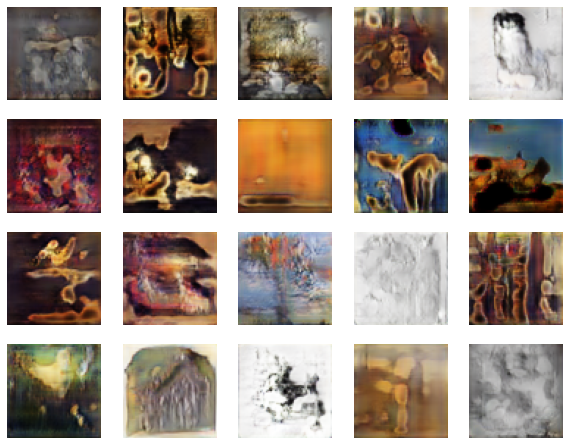

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])   #plotting some random images from the generator
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')

In [ ]:
train(training_dataset, 100)

Epoch 1, gen loss = 2.2220265865325928, disc loss = 0.7864216566085815
Epoch 2, gen loss = 2.2987523078918457, disc loss = 0.7395311594009399
Epoch 3, gen loss = 2.296983242034912, disc loss = 0.7918429374694824
Epoch 4, gen loss = 2.2516531944274902, disc loss = 0.788978636264801
Epoch 5, gen loss = 2.2578647136688232, disc loss = 0.7733215093612671
Epoch 6, gen loss = 2.3161988258361816, disc loss = 0.7441256642341614
Epoch 7, gen loss = 2.4296326637268066, disc loss = 0.6951249837875366
Epoch 8, gen loss = 2.344849109649658, disc loss = 0.7615678310394287
Epoch 9, gen loss = 2.368211269378662, disc loss = 0.7676345705986023
Epoch 10, gen loss = 2.397447109222412, disc loss = 0.7525361776351929
Epoch 11, gen loss = 2.3380699157714844, disc loss = 0.7645974159240723
Epoch 12, gen loss = 2.2890868186950684, disc loss = 0.7667110562324524
Epoch 13, gen loss = 2.4129581451416016, disc loss = 0.719702959060669
Epoch 14, gen loss = 2.2940940856933594, disc loss = 0.7945647239685059
Epoch 1

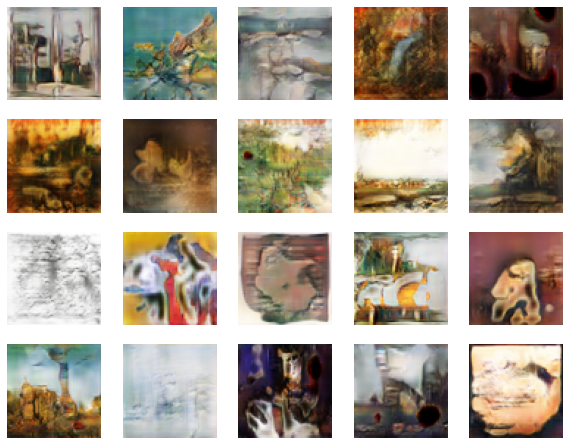

In [ ]:
seed2 = tf.random.normal([BATCH_SIZE, SEED_SIZE])   #plotting some random images from the generator
generated_images2 = generator(seed2, training = True)

generated_images2 =0.5 * generated_images2 + 0.5

fig = plt.figure(figsize=(10,10))
for i in range(1,21):
    fig.add_subplot(5,5,i)
    plt.imshow(generated_images2[i])
    plt.axis('off')